<a href="https://colab.research.google.com/github/ramkiramanathan/ANN_Try/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Importing the cleaned Data from my repo

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Afsaan/Deep-Learning/master/Artificial%20Neural%20Netwrok/Chrun_modelling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [5]:
df.Gender = df.Gender.map({'Female':0,'Male':1})

In [6]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df1 = pd.get_dummies(df,columns = ['Geography'])

In [8]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [10]:
df = df1[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France',
       'Geography_Germany', 'Geography_Spain','Exited', ]]

In [11]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
df[df[df.isnull()]]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(10000, 13)

In [14]:
df.drop_duplicates()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0,1


In [15]:
df.dropna(inplace = True)

In [16]:
df.shape

(10000, 13)

In [17]:
df.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Exited               0
dtype: int64

In [18]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Exited                 int64
dtype: object

In [31]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


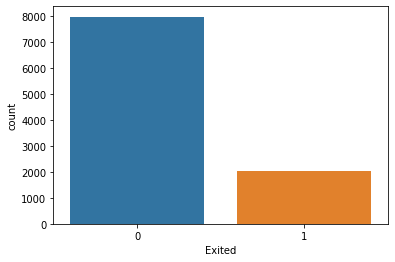

In [20]:
sns.countplot('Exited',data = df)

In [21]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

##From the above plot, the data looks imbalanced. Lets balance it using SMOTEENN Technique

##Scaling

In [22]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##SMOTEENN Sampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


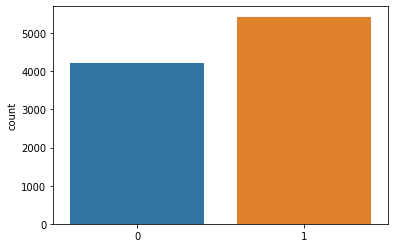

In [24]:
smt = SMOTEENN()
x_smt,y_smt = smt.fit_resample(X_train_scaled,Y_train)
sns.countplot(y_smt)

In [25]:
# smt = SMOTE()
# x_smt,y_smt = smt.fit_resample(X_train,Y_train)
# sns.countplot(y_smt)

##Let's train the Data

In [26]:
# creating  a model



model = Sequential([

          Dense(100 , activation='relu' , kernel_initializer='he_uniform'),  # hidden layer 2
          Dropout(0.8),


          Dense(50 , activation='sigmoid'), # hidden layer 3
          Dropout(0.8),


          Dense(25 , activation='relu', kernel_initializer='he_uniform'),  # hidden layer 4
          Dropout(0.8),

 
          Dense(1 , activation='sigmoid')  # output layer 


])

In [27]:
# compilation of the model
model.compile(optimizer = 'SGD' , loss = 'BinaryCrossentropy' , metrics = ['AUC'])

In [28]:
model.fit(X_train , Y_train , epochs=30 , validation_split=0.2 , batch_size=32)

Epoch 1/30
200/200 [==============================] - 2s 3ms/step - loss: 0.8244 - auc: 0.5078 - val_loss: 0.5747 - val_auc: 0.4917
Epoch 2/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5748 - auc: 0.4961 - val_loss: 0.5588 - val_auc: 0.4120
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5429 - auc: 0.4995 - val_loss: 0.5412 - val_auc: 0.4173
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5346 - auc: 0.4895 - val_loss: 0.5369 - val_auc: 0.4781
Epoch 5/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5250 - auc: 0.4977 - val_loss: 0.5350 - val_auc: 0.4600
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5175 - auc: 0.5122 - val_loss: 0.5252 - val_auc: 0.4336
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: 0.5150 - auc: 0.5070 - val_loss: 0.5249 - val_auc: 0.3990
Epoch 8/30
200/200 [==============================] - 0s 2ms/step - loss: 0.

In [29]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 994us/step


In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,y_pred)

0.5383221552419849